In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

In [2]:
stock = "GOOGL"
df = pd.DataFrame(yf.download(stock, '2010-01-01', '2022-12-31')["Close"])

[*********************100%***********************]  1 of 1 completed


In [3]:
def rolling(lag, data):
    A = []
    df = data.tolist()
    for i in range(lag, len(df)):
        A.append(df[i-lag:i]) 
    return pd.DataFrame(A)

def GradientBoost(x,y):
    model = GradientBoostingRegressor()  
    model.fit(x,y)
    return model
    
def UoD(x):
    if x<0:
        return -1
    else: 
        return 1
    
def train_test_split(x,y,test_size):
    i = int(len(x)*test_size)
    j = int(len(y)*test_size)
    return x[:i], x[i:], y[:j], y[j:]

In [4]:
lag = 3
A = rolling(lag, df["Close"])
b = df["Close"][lag::]
deon, dete, keyon, keyte = train_test_split(A,b, test_size=0.5)

In [6]:
a= GradientBoost(deon, keyon)

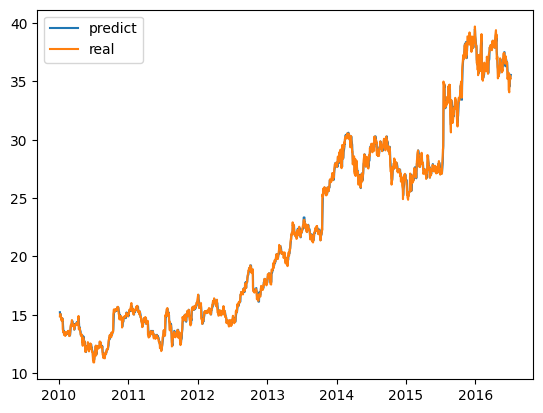

In [9]:
plt.plot(keyon.index,a.predict(deon), label="predict")
plt.plot(keyon, label="real")
plt.legend()